Predictions:
[[0.06368082]
 [0.94085536]
 [0.94108726]
 [0.06402009]]


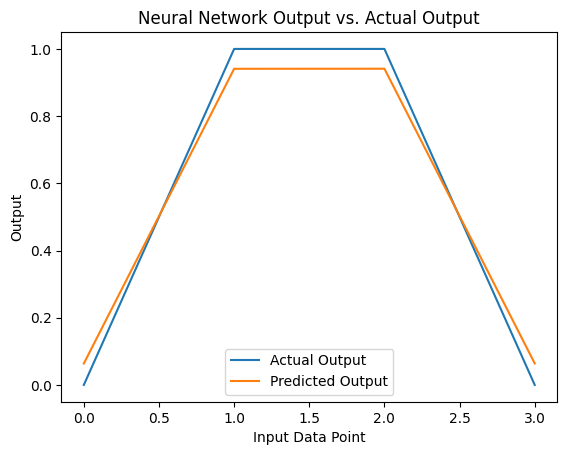

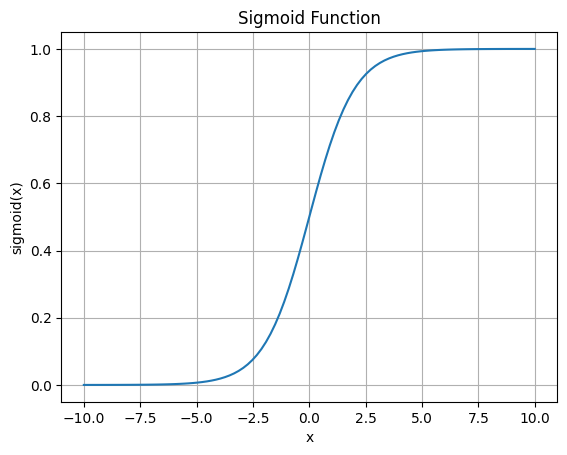

Predictions:
[[0.99970211]
 [0.9998057 ]
 [0.99986595]
 [0.99989729]]


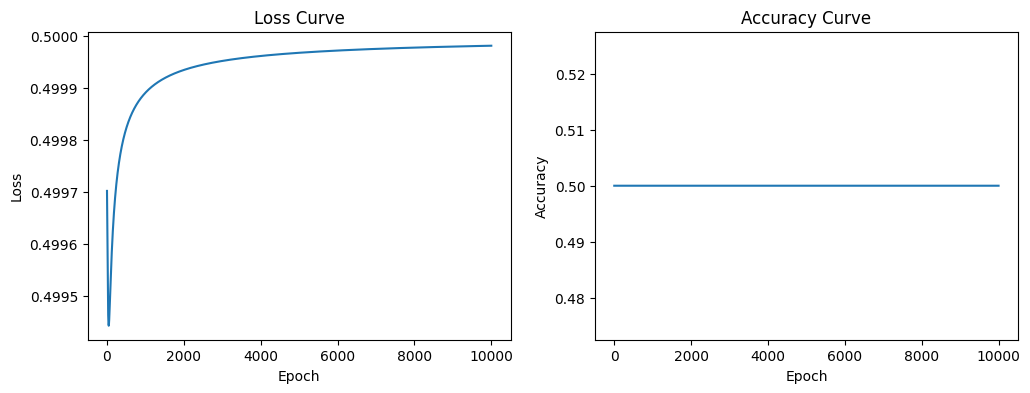

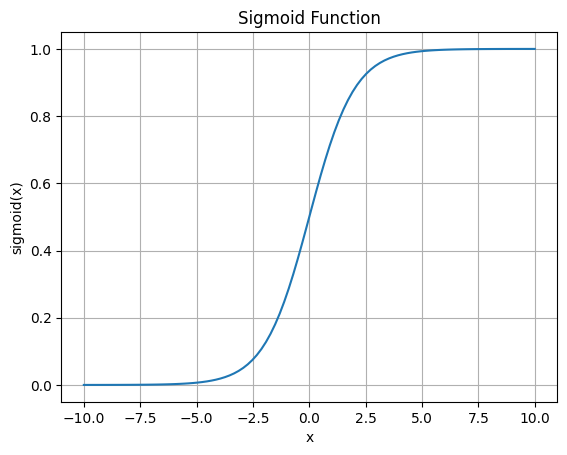

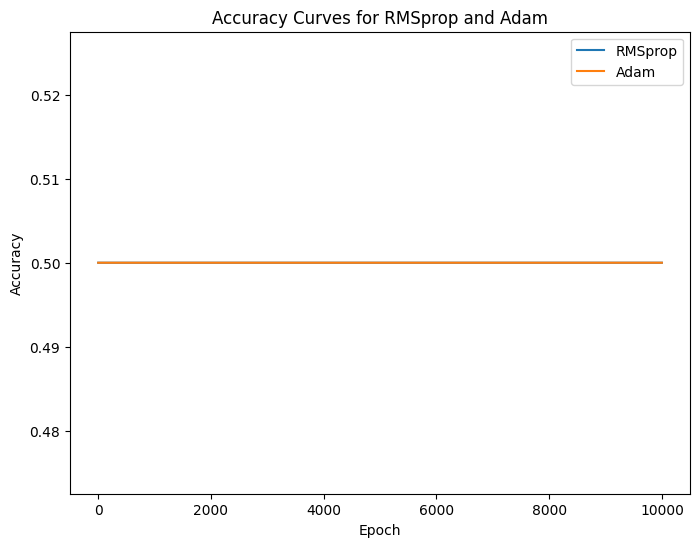

RMSprop Final Accuracy: 50.00%
Adam Final Accuracy: 50.00%


In [2]:
#Model a 2-input XOR gate with Multi layer perceptron by backpropogation algorithm

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
np.random.seed(1)
weights_hidden = np.random.rand(2, 2)
bias_hidden = np.random.rand(1, 2)
weights_output = np.random.rand(2, 1)
bias_output = np.random.rand(1, 1)

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
  # Forward propagation
  hidden_layer_activation = np.dot(X, weights_hidden) + bias_hidden
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, weights_output) + bias_output
  predicted_output = sigmoid(output_layer_activation)

  # Backpropagation
  error = y - predicted_output
  d_predicted_output = error * sigmoid_derivative(predicted_output)

  error_hidden_layer = d_predicted_output.dot(weights_output.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  # Update weights and biases
  weights_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
  bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
  weights_hidden += X.T.dot(d_hidden_layer) * learning_rate
  bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the trained model
print("Predictions:")
print(predicted_output)

#Graph
plt.plot(y, label='Actual Output')
plt.plot(predicted_output, label='Predicted Output')
plt.xlabel('Input Data Point')
plt.ylabel('Output')
plt.title('Neural Network Output vs. Actual Output')
plt.legend()
plt.show()

#Sigmoid function graph

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Generate x values for the sigmoid function
x = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

#Accuracy and loss graph

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
np.random.seed(1)
weights_hidden = np.random.rand(2, 2)
bias_hidden = np.random.rand(1, 2)
weights_output = np.random.rand(2, 1)
bias_output = np.random.rand(1, 1)

# Training parameters
learning_rate = 0.1
epochs = 10000

# Define different optimizers
def gradient_descent(weights, bias, gradient, learning_rate):
  weights -= learning_rate * gradient
  bias -= learning_rate * np.sum(gradient, axis=0, keepdims=True)
  return weights, bias

def momentum(weights, bias, gradient, learning_rate, momentum_rate=0.9, velocity=None):
  if velocity is None:
    velocity = np.zeros_like(gradient)
  velocity = momentum_rate * velocity - learning_rate * gradient
  weights += velocity
  bias += np.sum(velocity, axis=0, keepdims=True)
  return weights, bias, velocity

def adam(weights, bias, gradient, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8, m=None, v=None):
  if m is None:
    m = np.zeros_like(gradient)
  if v is None:
    v = np.zeros_like(gradient)
  m = beta1 * m + (1 - beta1) * gradient
  v = beta2 * v + (1 - beta2) * (gradient ** 2)
  m_hat = m / (1 - beta1)
  v_hat = v / (1 - beta2)
  weights -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
  bias -= np.sum(learning_rate * m_hat / (np.sqrt(v_hat) + epsilon), axis=0, keepdims=True)
  return weights, bias, m, v

# Choose an optimizer (e.g., gradient_descent, momentum, adam)
optimizer = gradient_descent

# Training loop with optimizer
losses = []
accuracies = []
velocity_hidden = None
velocity_output = None
m_hidden = None
v_hidden = None
m_output = None
v_output = None

for epoch in range(epochs):
  # Forward propagation
  hidden_layer_activation = np.dot(X, weights_hidden) + bias_hidden
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, weights_output) + bias_output
  predicted_output = sigmoid(output_layer_activation)

  # Backpropagation
  error = y - predicted_output
  d_predicted_output = error * sigmoid_derivative(predicted_output)

  error_hidden_layer = d_predicted_output.dot(weights_output.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  # Update weights and biases using the chosen optimizer
  if optimizer == gradient_descent:
    weights_output, bias_output = gradient_descent(weights_output, bias_output, hidden_layer_output.T.dot(d_predicted_output), learning_rate)
    weights_hidden, bias_hidden = gradient_descent(weights_hidden, bias_hidden, X.T.dot(d_hidden_layer), learning_rate)
  elif optimizer == momentum:
    weights_output, bias_output, velocity_output = momentum(weights_output, bias_output, hidden_layer_output.T.dot(d_predicted_output), learning_rate, velocity=velocity_output)
    weights_hidden, bias_hidden, velocity_hidden = momentum(weights_hidden, bias_hidden, X.T.dot(d_hidden_layer), learning_rate, velocity=velocity_hidden)
  elif optimizer == adam:
    weights_output, bias_output, m_output, v_output = adam(weights_output, bias_output, hidden_layer_output.T.dot(d_predicted_output), learning_rate, m=m_output, v=v_output)
    weights_hidden, bias_hidden, m_hidden, v_hidden = adam(weights_hidden, bias_hidden, X.T.dot(d_hidden_layer), learning_rate, m=m_hidden, v=v_hidden)

  # Calculate loss and accuracy
  loss = np.mean(np.abs(error))
  losses.append(loss)
  accuracy = np.mean((predicted_output > 0.5) == y)
  accuracies.append(accuracy)

# Test the trained model
print("Predictions:")
print(predicted_output)

# Plot loss and accuracy graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

plt.show()

# Plot the sigmoid function
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

#rmsprop and adam accuracy percentage with the graph

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
np.random.seed(1)
weights_hidden = np.random.rand(2, 2)
bias_hidden = np.random.rand(1, 2)
weights_output = np.random.rand(2, 1)
bias_output = np.random.rand(1, 1)

# Training parameters
learning_rate = 0.1
epochs = 10000

# Define different optimizers
def gradient_descent(weights, bias, gradient, learning_rate):
  weights -= learning_rate * gradient
  bias -= learning_rate * np.sum(gradient, axis=0, keepdims=True)
  return weights, bias

def momentum(weights, bias, gradient, learning_rate, momentum_rate=0.9, velocity=None):
  if velocity is None:
    velocity = np.zeros_like(gradient)
  velocity = momentum_rate * velocity - learning_rate * gradient
  weights += velocity
  bias += np.sum(velocity, axis=0, keepdims=True)
  return weights, bias, velocity

def rmsprop(weights, bias, gradient, learning_rate, decay_rate=0.9, epsilon=1e-8, cache=None):
  if cache is None:
    cache = np.zeros_like(gradient)
  cache = decay_rate * cache + (1 - decay_rate) * (gradient ** 2)
  weights -= learning_rate * gradient / (np.sqrt(cache) + epsilon)
  bias -= np.sum(learning_rate * gradient / (np.sqrt(cache) + epsilon), axis=0, keepdims=True)
  return weights, bias, cache

def adam(weights, bias, gradient, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8, m=None, v=None):
  if m is None:
    m = np.zeros_like(gradient)
  if v is None:
    v = np.zeros_like(gradient)
  m = beta1 * m + (1 - beta1) * gradient
  v = beta2 * v + (1 - beta2) * (gradient ** 2)
  m_hat = m / (1 - beta1)
  v_hat = v / (1 - beta2)
  weights -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
  bias -= np.sum(learning_rate * m_hat / (np.sqrt(v_hat) + epsilon), axis=0, keepdims=True)
  return weights, bias, m, v

# Choose an optimizer (e.g., gradient_descent, momentum, rmsprop, adam)
optimizers = [rmsprop, adam]
optimizer_names = ['RMSprop', 'Adam']
accuracies_list = []

for optimizer in optimizers:
  # Reset weights and biases for each optimizer
  np.random.seed(1)
  weights_hidden = np.random.rand(2, 2)
  bias_hidden = np.random.rand(1, 2)
  weights_output = np.random.rand(2, 1)
  bias_output = np.random.rand(1, 1)

  # Training loop with optimizer
  losses = []
  accuracies = []
  velocity_hidden = None
  velocity_output = None
  cache_hidden = None
  cache_output = None
  m_hidden = None
  v_hidden = None
  m_output = None
  v_output = None

  for epoch in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(X, weights_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, weights_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases using the chosen optimizer
    if optimizer == rmsprop:
      weights_output, bias_output, cache_output = rmsprop(weights_output, bias_output, hidden_layer_output.T.dot(d_predicted_output), learning_rate, cache=cache_output)
      weights_hidden, bias_hidden, cache_hidden = rmsprop(weights_hidden, bias_hidden, X.T.dot(d_hidden_layer), learning_rate, cache=cache_hidden)
    elif optimizer == adam:
      weights_output, bias_output, m_output, v_output = adam(weights_output, bias_output, hidden_layer_output.T.dot(d_predicted_output), learning_rate, m=m_output, v=v_output)
      weights_hidden, bias_hidden, m_hidden, v_hidden = adam(weights_hidden, bias_hidden, X.T.dot(d_hidden_layer), learning_rate, m=m_hidden, v=v_hidden)

    # Calculate loss and accuracy
    loss = np.mean(np.abs(error))
    losses.append(loss)
    accuracy = np.mean((predicted_output > 0.5) == y)
    accuracies.append(accuracy)

  accuracies_list.append(accuracies)

# Plot accuracy graphs for RMSprop and Adam
plt.figure(figsize=(8, 6))
for i, accuracies in enumerate(accuracies_list):
  plt.plot(accuracies, label=optimizer_names[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves for RMSprop and Adam')
plt.legend()
plt.show()

# Print final accuracy percentages for RMSprop and Adam
for i, accuracies in enumerate(accuracies_list):
  print(f"{optimizer_names[i]} Final Accuracy: {accuracies[-1] * 100:.2f}%")